# Import libraries and Data

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('player_season_preprocessed.csv')

In [3]:
df.head()

,player_id,Season,Age,Competition,Club,club_id,position_group,New_season,Squad,Appearances,...,Own goals,Assists,Penalty goals,Yellow cards,Second yellow cards,Red cards,Substitutions on,Substitutions off,Minutes played,Minutes per goal
0,2857,17/18,32,Premier League,Leicester City,1003,Goalkeeper,False,10,2,...,0,0,0,0,0,0,0,0,180,0
1,16911,17/18,30,Premier League,Leicester City,1003,Goalkeeper,False,33,33,...,1,0,0,3,0,0,0,1,2966,0
2,56810,17/18,28,Premier League,Leicester City,1003,midfield,False,15,12,...,0,1,0,3,0,0,3,4,761,0
3,61560,17/18,27,Premier League,Leicester City,1003,midfield,False,35,34,...,0,7,0,5,0,1,4,10,2543,1272
4,65467,17/18,29,Premier League,Leicester City,1003,midfield,False,29,19,...,0,0,0,0,0,0,2,7,1414,471


# Defining Metrics

In [4]:
df.columns

Index(['player_id', 'Season', 'Age', 'Competition', 'Club', 'club_id',
       'position_group', 'New_season', 'Squad', 'Appearances',
       'club_clean_sheet', 'player_clean_sheet', 'Goals conceded', 'PPG',
       'Goals', 'Own goals', 'Assists', 'Penalty goals', 'Yellow cards',
       'Second yellow cards', 'Red cards', 'Substitutions on',
       'Substitutions off', 'Minutes played', 'Minutes per goal'],
      dtype='object')

[Text(0, 0, '1940'), Text(0, 0, '2511'), Text(0, 0, '794'), Text(0, 0, '2187')]

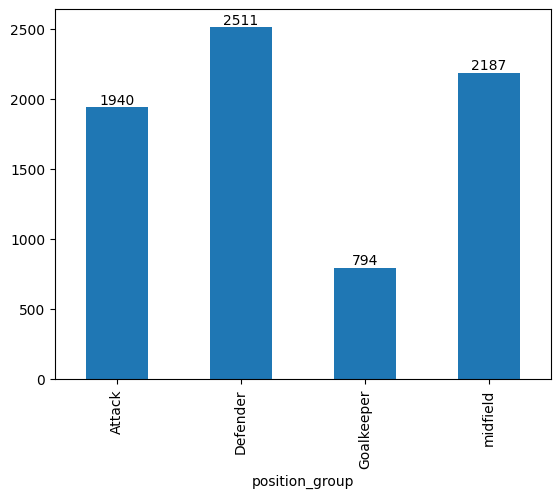

In [5]:
ax1 = df.groupby('position_group').player_id.count().plot(kind='bar')
ax1.bar_label(ax1.containers[0])

## We need season performance of players who have played

In [6]:
df = pd.read_csv('player_season_preprocessed.csv')

In [7]:
df.drop(df[df.Appearances == 0].index, inplace=True)

In [8]:
metric_score=[]
for index,record in df.iterrows():
    if record['position_group'] == 'Attack':
        Appearances = record['Appearances']
        goal = record['Goals']
        Assist= record['Assists']
        ppg = record['PPG'] # teammate_score
        forward_metric=(3*goal+Assist)/Appearances + ppg 
        Minutes= record['Minutes played']
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            forward_metric += increment+1
        metric_score.append(forward_metric)

    elif record['position_group'] =='Goalkeeper':
        clean_sheet= record['player_clean_sheet']
        goal_coneded= record['Goals conceded']
        own_goal = record['Own goals']
        Appearances = record['Appearances']
        ppg = record['PPG'] # teammate_score
        Goalkeeper_metric= (3*clean_sheet - goal_coneded - 2*own_goal)/Appearances + ppg
        Minutes= record['Minutes played']
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            Goalkeeper_metric += increment+1
        metric_score.append(Goalkeeper_metric)


    elif record['position_group'] == 'Defender':
        team_cleansheet = record['club_clean_sheet']   
        red_card=int(record['Red cards'])
        Minutes= record['Minutes played']
        own_goal = record['Own goals']
        Appearances = record['Appearances']
        ppg = record['PPG'] # teammate_score
        Defender_metric=(2*team_cleansheet-red_card -own_goal)/Appearances + ppg
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            Defender_metric += increment+1
        metric_score.append(Defender_metric)

    elif record['position_group'] == 'midfield':
        goal= record['Goals']
        red_card= record['Red cards']
        Assist= record['Assists']
        Appearances = record['Appearances']
        ppg = record['PPG'] # teammate_score
        midfield_metric=((goal+Assist)*3-red_card)/Appearances + ppg
        Minutes= record['Minutes played']
        if Minutes >= 100:
            increment = Minutes // 100 # experience_score
            midfield_metric += increment+1
        metric_score.append(midfield_metric)    
    else:
         metric_score.append(0)   

df['perf_score'] = metric_score

Text(0.5, 1.0, 'Performance score before normalization')

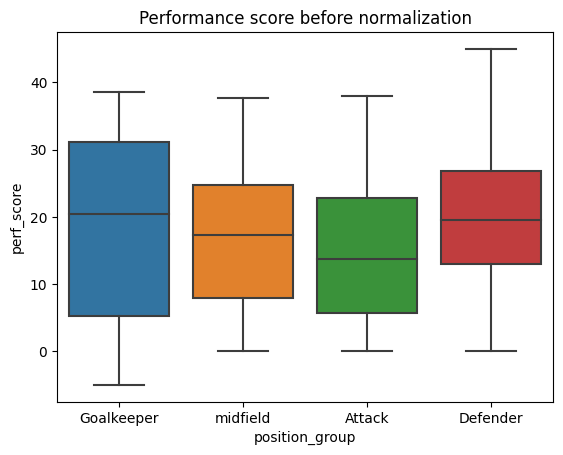

In [9]:
fig2 , ax2 = plt.subplots()
sns.boxplot(data=df, x='position_group', y='perf_score', ax=ax2)
ax2.set_title('Performance score before normalization')

## Normilizing metrics for each position

In [10]:
def normalize(arr):
    max = np.max(arr)
    min = np.min(arr)
    Q = 100
    return (arr - min)/(max - min) * Q

In [11]:
df.loc[df[df.position_group == 'Attack'].index, 'perf_score'] = normalize(df[df.position_group == 'Attack'].perf_score)
df.loc[df[df.position_group == 'Goalkeeper'].index, 'perf_score'] = normalize(df[df.position_group == 'Goalkeeper'].perf_score)
df.loc[df[df.position_group == 'Defender'].index, 'perf_score'] = normalize(df[df.position_group == 'Defender'].perf_score)
df.loc[df[df.position_group == 'midfield'].index, 'perf_score'] = normalize(df[df.position_group == 'midfield'].perf_score)

Text(0.5, 1.0, 'Performance score after normalization')

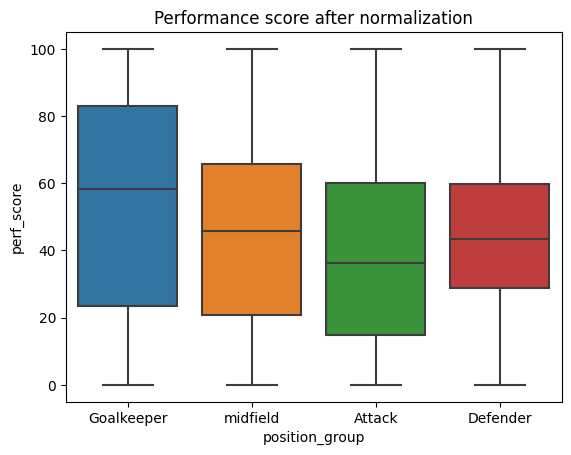

In [12]:
fig3 , ax3 = plt.subplots()
sns.boxplot(data=df, x='position_group', y='perf_score', ax=ax3)
ax3.set_title('Performance score after normalization')

In [13]:
fig2.savefig('metric_before_normalization.png')
fig3.savefig('metric_after_normalization.png')

# Run Test

## Split Groups

In [14]:
df.columns

Index(['player_id', 'Season', 'Age', 'Competition', 'Club', 'club_id',
       'position_group', 'New_season', 'Squad', 'Appearances',
       'club_clean_sheet', 'player_clean_sheet', 'Goals conceded', 'PPG',
       'Goals', 'Own goals', 'Assists', 'Penalty goals', 'Yellow cards',
       'Second yellow cards', 'Red cards', 'Substitutions on',
       'Substitutions off', 'Minutes played', 'Minutes per goal',
       'perf_score'],
      dtype='object')

In [28]:
selectd_df = df[df.New_season == True]

In [29]:
group1 = selectd_df[selectd_df.Age > 30].perf_score.sort_values()
group2 = selectd_df[selectd_df.Age <= 30].perf_score.sort_values()

In [30]:
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

diff_ratio = (1-p_value)*100

t-statistic: -0.9168585754990605
p-value: 0.3611475967999871


In [31]:
print('As', diff_ratio, 'percent, performance of two groups are different.')


As 63.88524032000129 percent, performance of two groups are different.


Text(0.5, 0, 'As 63.89 percent, performance of two groups are different.')

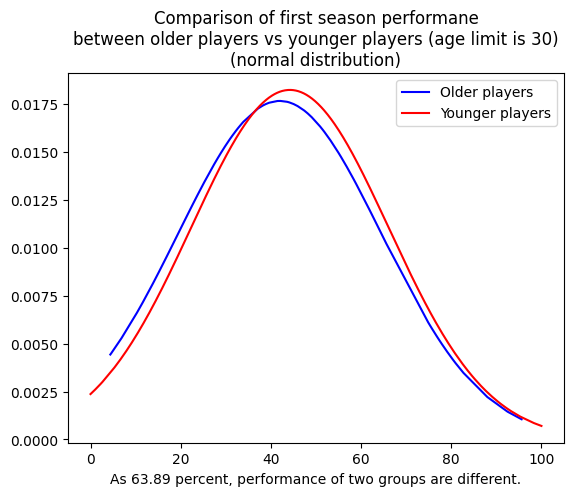

In [37]:
fig3, ax3 = plt.subplots()
p1 = stats.norm.pdf(group1, np.mean(group1), np.std(group1))
p2 = stats.norm.pdf(group2, np.mean(group2), np.std(group2))
ax3.plot(group1, p1, 'b', label = 'Older players')
ax3.plot(group2, p2, 'r', label = 'Younger players')
ax3.set_title('Comparison of first season performane\nbetween older players vs younger players (age limit is 30)\n(normal distribution)')
ax3.legend()
ax3.set_xlabel('As '+ str(round(diff_ratio,2)) +' percent, performance of two groups are different.')

In [38]:
fig3.savefig('hypothesis1_result.png')